<a href="https://colab.research.google.com/github/pjenkin/pjTensorFlowTut/blob/main/PJ_neural_networks_regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install -U neptune



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.6/502.6 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.4 MB/s eta 0:00:00
  Created wheel for bravado-core: filename=bravado_core-6.1.1-py2.py3-none-any.whl size=67675 sha256=6d5c9a428d363a2aff648bef265447e0f3526241d7e6900d1cd0f478874eba35
  Stored in directory: /root/.cache/pip/wheels/42/35/4a/44ec4c358db21a5d63ed4e40f0f0012a438106f220bce4ccba
Successfully built bravado-core


In [ ]:
import neptune
from getpass import getpass

my_api_token = getpass("eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJjNGY5MTM1Yy03YmM4LTRlOTAtODU1Zi00ZGJhZTBkODcwMDgifQ==")
my_project = "peternjenkin/TFPJ1"
run = neptune.init_run(api_token=my_api_token, project=my_project)

eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJjNGY5MTM1Yy03YmM4LTRlOTAtODU1Zi00ZGJhZTBkODcwMDgifQ==··········


[neptune] [warning] NeptuneWarning: By default, these monitoring options are disabled in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', 'capture_hardware_metrics'. You can set them to 'True' when initializing the run and the monitoring will continue until you call run.stop() or the kernel stops. NOTE: To track the source files, pass their paths to the 'source_code' argument. For help, see: https://docs.neptune.ai/logging/source_code/


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/peternjenkin/TFPJ1/e/TFPJONE-3


In [ ]:
# Intro  to regression with neural network in TF

import tensorflow as tf
print(tf.__version__)

2.17.0


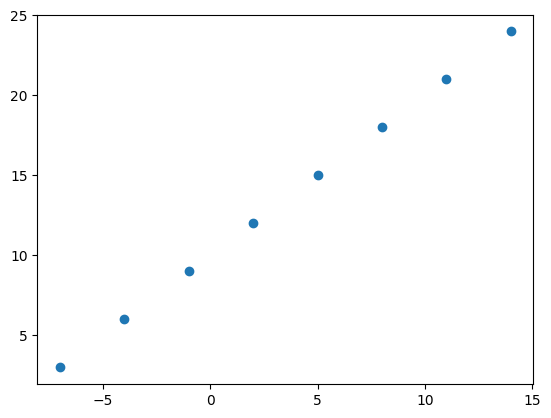

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create features (each x,y coordinate a feature)
X_list = [-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0]
#X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
X = tf.constant(X_list)

y_list = [3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0]
# create labels NB lower case y
#y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
y = tf.constant(y_list)

# visualise the feature

plt.scatter(X,y)

# y = X + 10

In [ ]:
# what will be the input and output shapes?
# 8 features, so 8x8 input
# NB scalars are rank zero tensor (X.ndim=0)
# should take in e.g. X=-7 output y=-3 i.e. 1 in, 1 out
print("Shapes as scalars:")
input_shape = X[0].shape
output_shape = y[0].shape
print(input_shape, output_shape)

# therefore, turn NumPy arrays into tensors
#X= tf.constant(X)
#y= tf.constant(y)
# this is done above actually
# y= tf.cast(tf.constant(y), dtype=tf.float32) # float32 def not needed

print("X,y:",X,y)
print("Now the input shapes:")
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape # these elements are tensors i.e. each element a feature i.e. one-shot represented by a tensor


Shapes as scalars:
() ()
X,y: tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float32) tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float32)
Now the input shapes:


(TensorShape([]), TensorShape([]))

In [ ]:
# Steps 1-3 in modelling with TensorFlow
#1 create model define (a) input (b) output (c) hidden layers
#2 compile model define (a) loss function (says how wrong is model), (b) optimiser (how to self-improve patterns) (c) evaluation metrics (model performance values)
#3 fit model - let model use features & labels to find pattern between X and y


tf.random.set_seed(42)  #42

#1 create model
model = tf.keras.Sequential([tf.keras.layers.Dense(1)]) # could have used model.add(tf.keras.layers.Dense(1.....

#2 compile the model

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])
# mae for mean absolute error
# sgd for stochastic gradient descent (could have been written ["sgd"])
#

#3 fit the model
#model.fit(X,y, epochs=5)  # epochs = iterations/attempts over the data
model.fit(tf.expand_dims(X, axis=-1),y, epochs=5)  # epochs = iterations/attempts over the data


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 858ms/step - loss: 12.1653 - mae: 12.1653
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 12.0328 - mae: 12.0328
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 11.9003 - mae: 11.9003
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 11.7678 - mae: 11.7678
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 11.6353 - mae: 11.6353


In [ ]:
#Check values of X and y
print(X,y)
# try to make a prediction based on x=17 using the model (should be X+10=17)
#model.predict([17.0])
model.predict(np.array([17.0])) # NB numpy array required as predict argument
# should be 27. so -12, -16, +1 and so on are really not very good
# not sure if prediction + mae should equal ....?

tf.Tensor([-7. -4. -1.  2.  5.  8. 11. 14.], shape=(8,), dtype=float32) tf.Tensor([ 3.  6.  9. 12. 15. 18. 21. 24.], shape=(8,), dtype=float32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[9.507763]], dtype=float32)

In [ ]:
model.predict(np.array([20.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[11.17678]], dtype=float32)

In [ ]:
# for example, a demo tensor for house price
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price   # to see shapes

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)  # epochs = iterations/attempts over the data

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 11.5028 - mae: 11.5028
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 11.3703 - mae: 11.3703
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 11.2378 - mae: 11.2378
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 11.1053 - mae: 11.1053
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 10.9728 - mae: 10.9728
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 10.8403 - mae: 10.8403
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 10.7078 - mae: 10.7078
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 10.5753 - mae: 10.5753
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 10.4428 - mae: 10.4428
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 10.3103 - mae: 10.3103
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.1778 - mae: 10.1778
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.0453 - mae: 10.0453
Epoch 13/100
1/1 ━━━━━━━

In [ ]:
model.predict(np.array([17.0]))   # should be 27, so around 30 is not too bad
# (-20 with epochs=5, +30 with epochs=100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[29.975256]], dtype=float32)

In [ ]:
#make bigger dataset where y = X + 10
X = np.arange(-100,100,4)
y = np.arange(-110,90,4)
# or
y = X + 10

check_length = len(X)
print("Data length: ", check_length)


# 80% for training, 20% for testing
X_train = X[:40]
y_train = X[:40]

X_test = X[40:]
y_test = X[40:]

print("Training lengths: ",len(X_train),len(y_train))

Data length:  50
Training lengths:  40 40


Now to do some visualisation of the training and testing data

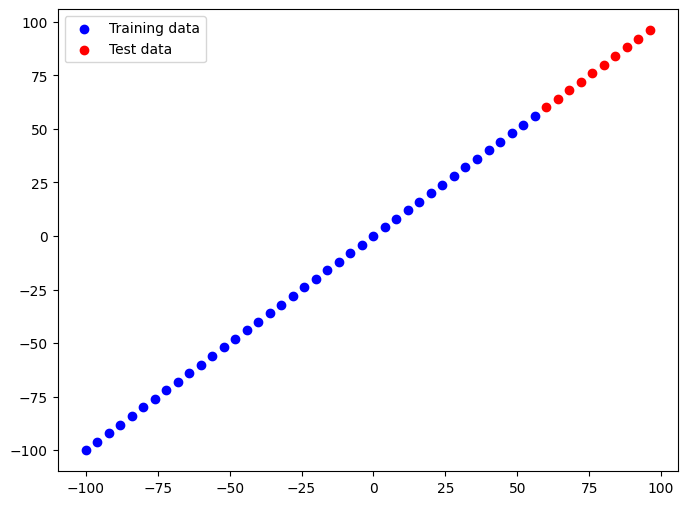

In [ ]:
plt.figure(figsize=(8,6))   # make a plot - figsize needed?
# Plot training in blue, test in red
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="r", label="Test data")
plt.legend()

In [ ]:
# Now to make a new model (similar steps to before 1-3)
tf.random.set_seed(67)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1]))  # NB beside 1-3, specifying shape is necessary for summary to work
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

#https://www.youtube.com/watch?v=njKP3FqW3Sk

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_expanded = tf.expand_dims(X,-1)  # do this just once, to overwrite X
model.fit(X_expanded,y, epochs=100) # re-fit model using newer definition
model.summary() # now re-check the summary and compare with previou summary

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17.6623 - mae: 17.6623 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.2133 - mae: 14.2133 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.8704 - mae: 14.8704
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.6235 - mae: 14.6235 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.1085 - mae: 14.1085 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.7585 - mae: 14.7585 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.5116 - mae: 14.5116
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.0036 - mae: 14.0036 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.6466 - mae: 14.6466 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.1242 - mae: 14.1242 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.7815 - mae: 14.7815 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.5346 - mae: 14.5346 
Epoch 13/100
2/2 ━━━━━━━

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

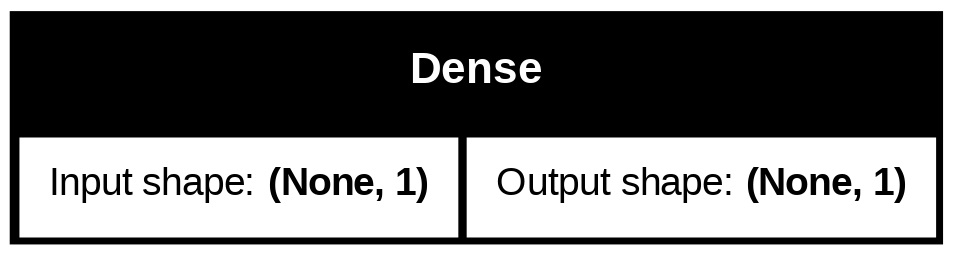

In [ ]:
# 'plotting' the model
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)
# slightly different plot (different tf version?)
# useful for more complicated (more inputs and outputs) models

In [ ]:
# make predictions on TEST (NOT on TRAIN)
y_predictions = model.predict(X_test)
y_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[49.298054],
       [52.509426],
       [55.7208  ],
       [58.932167],
       [62.143536],
       [65.35491 ],
       [68.566284],
       [71.77765 ],
       [74.98902 ],
       [78.20039 ]], dtype=float32)

In [ ]:
# define a function for plotting, as this'll be done a lot
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_predictions):
  '''
  To plot training, test and prediction data on same chart
  for comparison
  '''
  plt.figure(figsize=(8,6))
  plt.scatter(X_train, y_train, c="b", label="Training data")
  plt.scatter(X_test, y_test, c="r", label="Test data")
  plt.scatter(test_data, predictions, c="g", label="Predictions")
  plt.legend()


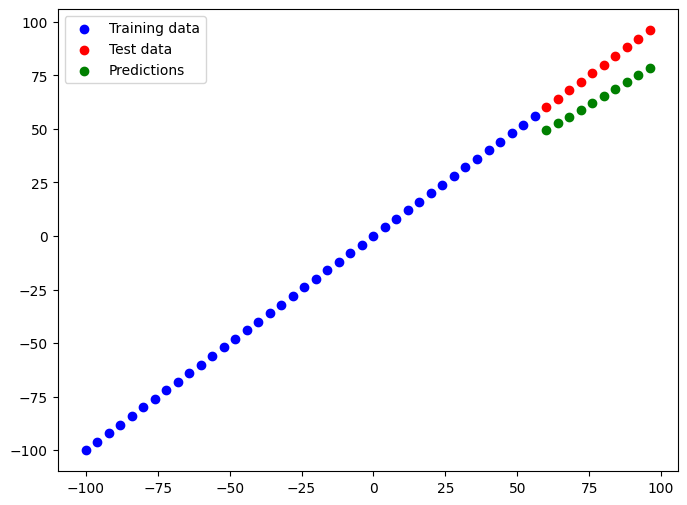

In [ ]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_predictions)

In [ ]:
# use model.evaluate to automatically predict and find the loss (in loss function (step 1) and metrics (step 3))
model.evaluate(X_test, y_test)
# MAE absolute error was used in steps 1 and 3 when defining the model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 14.2508 - mae: 14.2508


[14.250775337219238, 14.250775337219238]

In [ ]:
# In this case, since we used MAE for the loss function as well as MAE for the metrics, model.evaulate() returns them both
# There are also MAE and MSE functions - the output shape may well be different from the input's

#https://stackoverflow.com/a/69736845/11365317
#from tensorflow.keras.metrics import Metric

#mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_predictions)
#mae = tf.compat.v1.metrics.mean_absolute_error(labels=y_test, predictions=y_predictions)
metric = tf.keras.metrics.MeanAbsoluteError()
print("MAE: ",metric(y_test,y_predictions))
#print("MAE:", mae)
#mse = tf.metrics.mean_square_error(y_true=y_test, y_pred=y_predictions)
#print("MAE:", mse)
metric = tf.keras.metrics.MeanSquaredError()
print("MSE: ",metric(y_test,y_predictions))


MAE:  tf.Tensor(14.250775, shape=(), dtype=float32)
MSE:  tf.Tensor(208.21558, shape=(), dtype=float32)


In [ ]:
def mae(y_test,y_predictions):
  metric = tf.keras.metrics.MeanAbsoluteError()
  return metric(y_test,y_predictions)

def mse(y_test,y_predictions):
  metric = tf.keras.metrics.MeanSquaredError()
  return metric(y_test,y_predictions)

model_1 - same as original model, 1 layer, trained for 100 epochs.

model_2 - 2 layers, trained for 100 epochs.

model_3 - 2 layers, trained for 500 epochs.

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 43.9097 - mae: 43.9097 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.5236 - mae: 7.5236
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.4779 - mae: 11.4779 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.2135 - mae: 16.2135 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.7386 - mae: 17.7386 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.2136 - mae: 16.2136 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.7384 - mae: 17.7384 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.2138 - mae: 16.2138 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17.7382 - mae: 17.7382
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.2139 - mae: 16.2139 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.7380 - mae: 17.7380 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.2141 - mae: 16.2141 
Epoch 13/100
2/2 ━━━━━━━━━

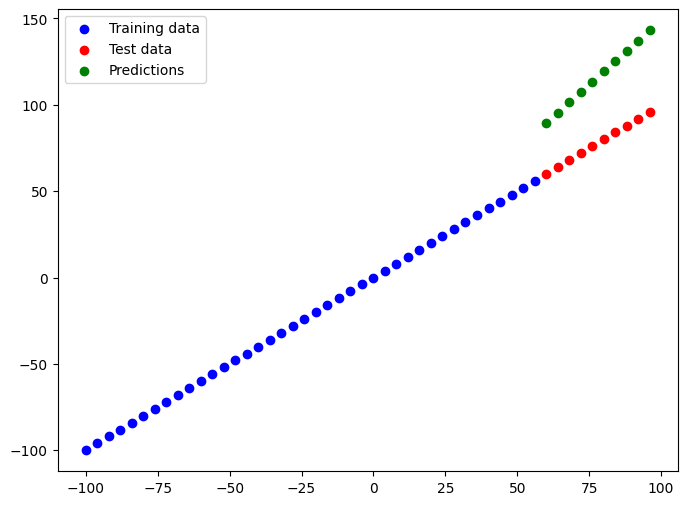

In [ ]:
# model 1
# Set random seed
tf.random.set_seed(67)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
model_1.evaluate(X_test, y_test)
plot_predictions(predictions=y_preds_1)
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
run["training/test/mae"].append(mae_1)
run["training/test/mse"].append(mse_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 49.2929 - mae: 49.2929


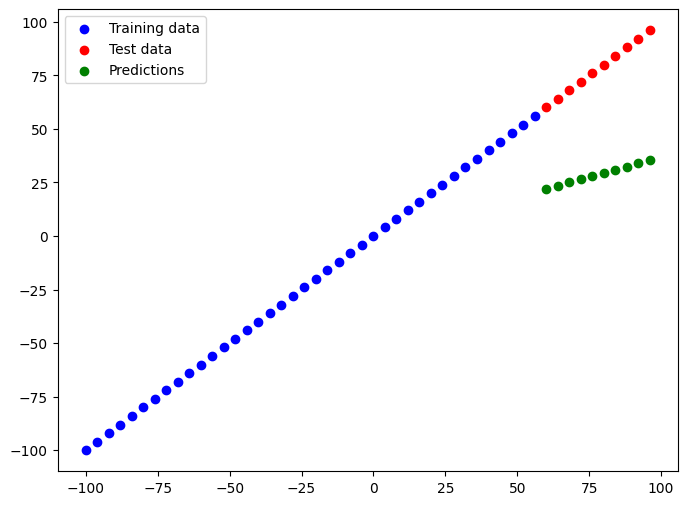

In [ ]:
# model 2 - two dense layers



# Set random seed
tf.random.set_seed(67)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
model_2.evaluate(X_test, y_test)
plot_predictions(predictions=y_preds_2)
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
run["training/test/mae"].append(mae_2)
run["training/test/mse"].append(mse_2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 48.7734 - mae: 48.7734


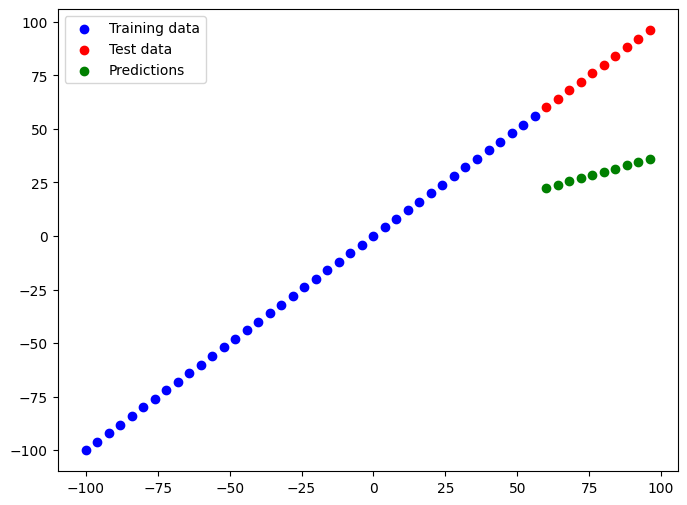

In [ ]:
# model 3 - two dense layers and 500 epochs
# Set random seed
tf.random.set_seed(67)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
model_3.evaluate(X_test, y_test)
plot_predictions(predictions=y_preds_3)
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
run["training/test/mae"].append(mae_3)
run["training/test/mse"].append(mse_3)

In [ ]:
model_results = [["model_1", tf.squeeze(mae_1).numpy(), tf.squeeze(mse_1).numpy()],
                 ["model_2", tf.squeeze(mae_2).numpy(), tf.squeeze(mse_2).numpy()],
                 ["model_3", tf.squeeze(mae_3).numpy(), tf.squeeze(mae_3).numpy()]]

# NB use of tf.squeeze and numpy()

import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,38.309078,1499.435425
1,model_2,49.292881,2482.448730
2,model_3,48.773369,48.773369


Saving and loading a model as a file (keras or HDF5/h5) - NB need to model.save and specify extension as either .h5 or .keras

.keras will save an execution graph (https://www.tensorflow.org/guide/intro_to_graphs)


HDF5 will save object config (https://en.wikipedia.org/wiki/Hierarchical_Data_Format )

In [ ]:
model_3.save("model_3_save_with_keras_extension.keras")
!ls model_3_save_with_keras_extension.keras


model_3_save_with_keras_extension.keras


In [ ]:
model_3.save("model_3_save_as_hdf5_ie_h5.h5")
!ls model_3_save_as_hdf5_ie_h5.h5

model_3_save_as_hdf5_ie_h5.h5


In [ ]:
loaded_saved_model_3_from_keras = tf.keras.models.load_model("model_3_save_with_keras_extension.keras")
loaded_saved_model_3_from_keras.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
loaded_saved_model_3_from_HDF5 = tf.keras.models.load_model("model_3_save_as_hdf5_ie_h5.h5")
loaded_saved_model_3_from_HDF5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
from google.colab import files
colab_downloaded_model = files.download("model_3_save_with_keras_extension.keras")
# download from colab - possibly a bit pointless

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Next: PJ_Neural_networks_regression_tensorflow_medical_costs_dataset